<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_1/l1_intro.jpeg?raw=true"> </center>

## Lecture 12 
### Ensemble learning and a demo of the KNIME Data Science platform




#### Nenad Svrzikapa
#### Harvard University
#### Python for Data Science
#### CSCI E-29

This lecture was prepared by using sources from: Aurelien Geron and Andreas C. Muller and Sarah Guido

Books:
* Introdution to Machine Learning With Python
* Hands-On Machine Learning With Scikit-Leadn and TensorFlor

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_1/2018_e29_staff.jpeg?raw=true"> </center>

## Section
<p class="grey"> 12:00 pm EST via ZOOM </p>
<hr class="red">
* Section will resume this week with Phil
* Psets 3 and 4
* Last section : Joe Pset 5


## Important Dates
<p class="grey"> NOTE: No late credits available for PSET5, EXAM or Graduate Project [No Exceptions]  </p>
- - -

* 4/29/2018 Problem Set 5 Due - Firm Deadline
* 5/02/2018 No Lecture / Graduate Projects Are Due [CAN NOT BE LATE] - Firm Deadline - Exam 2 posted
* 5/06/2018 Midnight Exam 2 Due -  [CAN NOT BE LATE] Firm Deadline
* 5/09/2018 Best Graduate Projects Movie Night, 7:40 - 8:40, off site meeting with staff.

## Important Information For your Graduate Projects
<p class="grey"> It's ok if your model undeperforms</p>
<hr class="red">
* Try your best
* Give an explanation why you think it may have not worked the way you expected
* Tell us about your attemps to make it better
* We will NOT evaluate projects based on your model performance

## Ensemble Learning
<p class="grey"> Approach that combines multiple machine learning models to combine more powerful models  </p>
- - -

* ensemble: A group of predictors (like in music)
* Kaggle winning solutions most often contain several Ensemble methods
* Famous example: Netflix Prize Competition

## Popular ensemble methods
<p class="grey"> Approach that combines multiple machine learning models to combine more powerful models  </p>
- - -

* Bagging
* Boosting (intro today, more Next class)
* Stacking

More broadly, two models belong to the ensmeble model category, they typically take advantage of decission trees as building blocks.  They happen to be the most effective ensemble models:
* Random Forest
* Gradient Boosting Decision Trees (Next class)

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.001.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.002.jpeg?raw=true"> </center>

### How is that possible?
---

* Biased Coin Analogy 0.51 Heads / 0.49 Tails
* Probability of getting a majority of heads after 1000 tosses is ~0.75
* If we toss the coin 10000 times p(majority of heads) > 0.97
* Law of large numbers, the more we toss the coin the closer the ratio of heads/tails is to 0.51/0.49


In [125]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

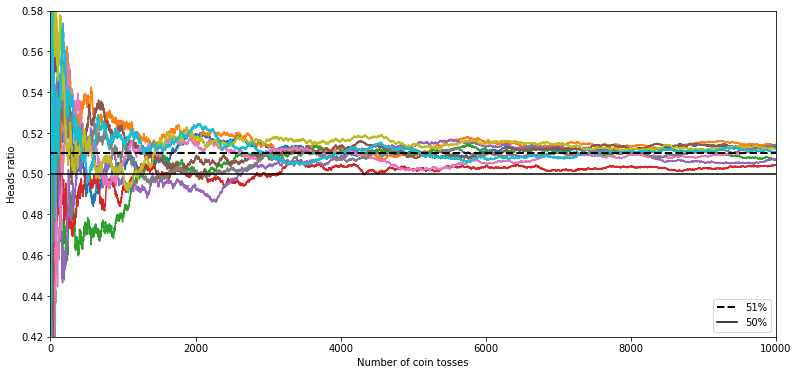

In [132]:
# Source: Aurelien Geron: Hands on Machine Learning with Scikit-Learn and Tensorflow
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)
plt.figure(figsize=(13,6))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

### Can we assume the same is true for classifiers that perform ~51%?
---

If we have 1000 of them can we hope for 75% accuracy?

* Yes and No.
* If they were fully independent, yes.
* But they are usually not because they train on the same data
* We aim to reduce making the same types of errors by training a diverse set of classifiers (hence they will make different types of errors and they will be more independent)


### Let's see this in action
<p class="grey"> The moons dataset  </p>


---

In [155]:
# Source: Aurelien Geron: Hands on Machine Learning with Scikit-Learn and Tensorflow
# Code adjusted to do soft voting
# soft voting applies if all classifiers have a predict_proba() method / picks class with highest average probability
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(estimators = [('lr', log_clf),
                                        ('rf',rnd_clf),
                                        ('svc',svm_clf)],voting = 'soft')
voting_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test, y_pred))   

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.888
VotingClassifier 0.912


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Bagging (Bootstrap aggregating) and Pasting
- - -


* One way to introduce "independance" is through using different algorithms
* Another way is to train the very same model on different random subsets of the data

Briefly the method:

1. We randomly sample m times, n samples from the dataset
2. We then train m models
3. Each individual model has a higher bias and variance than if it was trained on the original training set
4. Aggregation reduces variance while bias should more or less stay similar
5. Typically aggregation is done by picking the mode (the most frequent prediction) or in regression we could take the mean.


Can you think of why this may be a popular approach?


### Bagging and Pasting differences?
- - -


* Need to understand WR (With Replacement) and WOR (Without Replacement)
* WR - a datapoint may be sampled multiple times for a given classifier : BAGGING
* WOR - a datapoint may not be sampled more than once for a given classifier: PASTING


### Out-of-Bag Evaluation
- - -


* The idea is that when sampling some instances may be sampled several times and others may not be samples at all
* These are called Out of Bag Samples
* You can use these samples to evaluate the performance of each models (they are effectively a good test sample).


In [160]:
#Original Source: Aurelien Geron: Hands on Machine Learning with Scikit-Learn and Tensorflow

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#set bootstrap to False if you want to do pasting
#n_jobs -1 means use all the available CPUs that you have...you can specify how many to use
#n_estimators is the number of Decission Tree Classifiers
#max_samples is how many datapoints are samples per classifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=1000,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#bagging accuracy score
from sklearn.metrics import accuracy_score
print("Bagging score:", accuracy_score(y_test, y_pred))

#vs decision tree on the same dataset
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decission tree score", accuracy_score(y_test, y_pred_tree))


Bagging score: 0.904
Decission tree score 0.856


### Boosting
- - -


* Boosting is an ensemble method that combines several weak learners into a strong learner
* Boosting aims to reduce the variance of any given weak learner
* What is a weak learner?  Typically the definition of this is any model that is only slightly better than chance
* How is this accomplished?
    * Iterative learning of weak models on subsets of the data
    * Weighing each prediction based on the performance of the weak model
    * Combine the weak learners prediction into one weighted prediction 


Each predictor can be trained only after the previous has been trained and evaluated.  How do you think this will scale?

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.003.jpeg?raw=true"> </center>

### Popular Boosting Algorithms
- - -


* AdaBoost and XGBoost
* I like XGBoost better and I will give you a quick tour during the last day of class.
* (Note: XGBoost is not a part of scikit)


### Stacking or Stacked Generalization
- - -


* This is the idea: instead of using some aggregations techniques like voting, train a model to perform the aggregation.

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.004.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.005.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_12/images/Lecture_12.006.jpeg?raw=true"> </center>